## 1. 데이터 불러오기
- data 폴더 안에 있는 customer_data.csv 파일을 DataFrame으로 불러옵시다.
## 2. 데이터 탐색 및 전처리
- 데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.
- 각 컬럼이 어떤 값들로 이루어져 있는지 확인해 보세요.
- 결측값이 있다면 다른 값으로 채우거나 해당 로우를 제거해 보세요.
- 고객마다 총 구매 금액, 총 구매 횟수를 계산해 보세요.
- 데이터 분석에 불필요한 컬럼은 없는지 확인해 보세요.
## 3. 데이터 분석
- 고객들의 연령, 소득, 가족 구성 등 인구통계학적 정보를 파악해 보세요.
- 이상값이 존재한다면 적절히 처리해 보세요.
- RFM 분석 방법에 따라 고객 세그먼트를 분류해 보세요.
- 고객 세그먼트별로 고객 특성 및 소비 성향을 분석해 보세요.

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline

In [139]:
# 사용자 운영체제 확인
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

In [140]:
# 데이터 불러오기
# 쉼표가 아닌 tab으로 구분되어 있기 떄문에 sep='\t'
df = pd.read_csv('data/customer_data.csv', sep='\t')
df

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,...,9,4,2,0,0,0,0,0,0,11
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,...,8,5,7,1,0,0,0,0,0,11
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,...,2,13,1,0,0,0,1,0,0,11
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,...,6,10,2,0,0,0,0,0,0,11


In [141]:
# 데이터 개수
df.shape

(2240, 23)

In [142]:
# 컬럼별 데이터 타입 확인
df.dtypes

ID                         int64
signup_ym                 object
birth_year                 int64
annual_income            float64
marital_status            object
children                   int64
recency                    int64
amount_alcohol             int64
amount_fruit               int64
amount_meat                int64
amount_fish                int64
amount_snack               int64
amount_general             int64
num_purchase_web           int64
num_purchase_store         int64
num_purchase_discount      int64
promotion_1                int64
promotion_2                int64
promotion_3                int64
promotion_4                int64
promotion_5                int64
promotion_6                int64
revenue                    int64
dtype: object

In [143]:
# 통계정보
df.describe(include='all')

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240,2240.000000,2.216000e+03,2240,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,배우자 있음,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,NaN,1976.805804,6.792143e+07,NaN,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,...,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,NaN,11.984069,3.272500e+07,NaN,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,...,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,NaN,1901.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,NaN,1967.000000,4.589390e+07,NaN,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,...,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,NaN,1978.000000,6.679595e+07,NaN,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,...,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,NaN,1985.000000,8.907860e+07,NaN,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,...,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0


In [144]:
# 결측값 여부 확인
df.isnull().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

In [145]:
# 결측값 제거
df = df.dropna()

In [146]:
# 결측값 제거 후 확인
df.isnull().sum()

ID                       0
signup_ym                0
birth_year               0
annual_income            0
marital_status           0
children                 0
recency                  0
amount_alcohol           0
amount_fruit             0
amount_meat              0
amount_fish              0
amount_snack             0
amount_general           0
num_purchase_web         0
num_purchase_store       0
num_purchase_discount    0
promotion_1              0
promotion_2              0
promotion_3              0
promotion_4              0
promotion_5              0
promotion_6              0
revenue                  0
dtype: int64

In [147]:
# 고객마다 총 구매금액
df['amount_total'] = df['amount_alcohol'] + df['amount_fruit'] + df['amount_meat'] + df['amount_fish'] + df['amount_snack'] + df['amount_general']
df.head(5)

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\721866552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_total'] = df['amount_alcohol'] + df['amount_fruit'] + df['amount_meat'] + df['amount_fish'] + df['amount_snack'] + df['amount_general']


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,amount_total
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,4,3,0,0,0,0,0,1,11,2102100
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,2,2,0,0,0,0,0,0,11,35100
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,10,1,0,0,0,0,0,0,11,1008800
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,4,2,0,0,0,0,0,0,11,68900
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,6,5,0,0,0,0,0,0,11,548600


In [148]:
# 고객마다 총 구매횟수
df['num_purchase_total'] = df['num_purchase_web'] + df['num_purchase_store'] + df['num_purchase_discount']
df.head(5)

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\3377890603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_purchase_total'] = df['num_purchase_web'] + df['num_purchase_store'] + df['num_purchase_discount']


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,amount_total,num_purchase_total
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,3,0,0,0,0,0,1,11,2102100,15
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,2,0,0,0,0,0,0,11,35100,5
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,1,0,0,0,0,0,0,11,1008800,19
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,0,0,0,0,0,0,11,68900,8
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,0,0,0,0,0,0,11,548600,16


In [149]:
# 출생연도를 나이로 바꾸기
df['age'] = 2024 - df['birth_year']
df

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\502917027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2024 - df['birth_year']


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,amount_total,num_purchase_total,age
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,0,0,0,0,0,1,11,2102100,15,59
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,0,0,0,0,0,0,11,35100,5,62
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,0,0,0,0,0,0,11,1008800,19,51
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,0,0,0,0,0,0,11,68900,8,32
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,0,0,0,0,0,0,11,548600,16,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,...,0,0,0,0,0,0,11,1743300,15,49
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,...,1,0,0,0,0,0,11,577200,20,70
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,...,0,0,0,1,0,0,11,1613300,16,35
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,...,0,0,0,0,0,0,11,1095900,18,60


<Axes: xlabel='annual_income'>

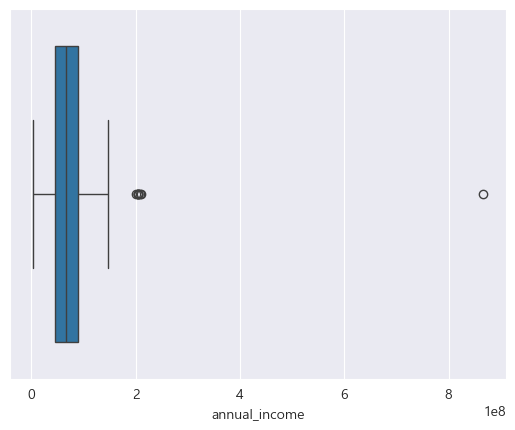

In [150]:
# 이상치 탐지
sns.boxplot(data = df, x='annual_income')

In [151]:
# iqr 구하기
q1 = df['annual_income'].quantile(0.25)
q3 = df['annual_income'].quantile(0.75)
iqr= q3 - q1

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\620779705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[cond].index, inplace=True)


<Axes: xlabel='annual_income'>

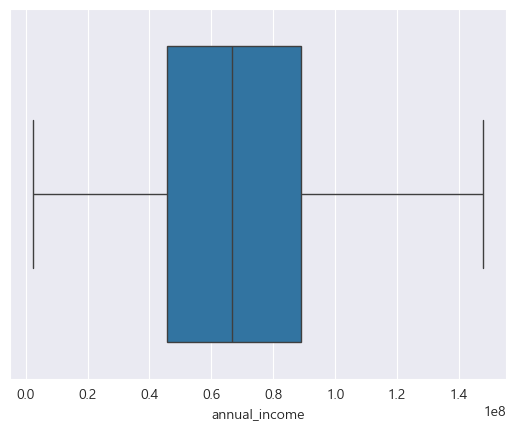

In [152]:
# 이상치 삭제
cond = (q3 + iqr * 1.5 < df['annual_income']) | (q1 - iqr * 1.5 > df['annual_income'])
df.drop(df[cond].index, inplace=True)
sns.boxplot(data = df, x='annual_income')

## Recency, Frequency, Monetary 등급 매기기
우선 Recency, Frequency, Monetary 각 항목의 등급 개수를 지정해야 합니다. 편의상 3개로 하여 1등급, 2등급, 3등급으로 나누겠습니다. 이때 등급의 숫자는 클수록 더 긍정적인 것으로 가정할게요. 즉, Recency 등급의 숫자는 클수록 더 최근에 구매했다는 뜻이고, Frequency 등급의 숫자는 클수록 더 자주 구매했다는 뜻이며, Monetary 등급의 숫자는 클수록 돈을 더 많이 썼다는 의미가 됩니다. 등급 개수는 앞으로 자주 사용할 예정이라서 미리 num_grades라는 변수에 담아 놓겠습니다.


In [154]:
num_grades = 3

In [155]:
# Recency, Frequency, Monetary 각 항목의 등급을 숫자로 표시하기 위해 grade_labels라는 리스트 변수
grade_labels = list(range(1, num_grades + 1))
grade_labels

[1, 2, 3]

이번 해설 노트에서는 편의상 각 등급마다 고객의 수를 최대한 균등하게 나누겠습니다. 이런 방식에 사용되는 함수는 qcut()으로, x 파라미터에 넣어 준 데이터를 q 파라미터에 넣어 준 값만큼 등분해 줍니다.이 함수에서는 labels 파라미터를 통해 각 등급을 어떻게 표시할지 지정할 수 있는데요. recency 컬럼 값이 작은 고객일수록 최근에 구매를 했다는 뜻이니 Recency 등급을 더 높게 부여해야 합니다. 즉, qcut()을 통해 고객을 세 그룹으로 나누었을 때 앞 그룹이 3등급, 중간 그룹이 2등급, 뒷 그룹이 1등급이 되는 거죠. 따라서 labels 파라미터에 grade_labels를 역순으로 넣어 줘야 해요. 역순으로 뒤집힌 리스트는 원본 리스트를 [::-1]처럼 슬라이싱 해 주면 얻을 수 있습니다. 그럼 qcut() 함수의 x에 recency 컬럼 데이터를 전달하고, q에는 num_grades 변수를 전달하고, labels에는 grade_labels[::-1]을 전달해 볼게요.

In [156]:
# qcut(x, q): x 파라미터에 넣어 준 데이터를 q 파라미터에 넣어 준 값만큼 등분
recency_grade = pd.qcut(x=df['recency'], q=num_grades, labels=grade_labels[::-1])

In [157]:
df['recency_grade'] = recency_grade

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\4152851442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recency_grade'] = recency_grade


In [160]:
df['recency_grade'].value_counts()

recency_grade
3    753
1    731
2    724
Name: count, dtype: int64

그럼 Recency 등급에 따라 매출 기여도가 어떻게 다른지 시각화해 볼까요? 각 등급의 매출 기여도는 전체 매출 대비 해당 등급의 매출 비율로 구할 수 있습니다. 그렇다면 먼저 recency_grade 컬럼 기준으로 groupby 한 다음 sum() 함수를 써서 등급별 매출 합계를 구해야겠군요. sum() 함수를 사용할 때에는 숫자 값들만 합을 구할 수 있게 numeric_only 값을 True로 설정하겠습니다. 마지막으로 reset_index() 함수까지 사용해 주면 깔끔하게 recency_grade도 컬럼으로 만들 수 있어요. 이 groupby 결과는 groupby_recency_grade 변수에 담겠습니다. 1등급에서 3등급으로 갈수록 recency 컬럼의 값이 줄어드는 걸 보면 등급이 제대로 매겨진 것 같군요.

In [162]:
groupby_recency_grade = df.groupby('recency_grade').sum(numeric_only=True).reset_index()
groupby_recency_grade

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\2207962456.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_recency_grade = df.groupby('recency_grade').sum(numeric_only=True).reset_index()


,recency_grade,ID,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,amount_total,num_purchase_total,age
0,3,4349747,1488871,5.067041e+10,679,12011,293956000,26728000,157583400,37592100,...,54,12,67,55,60,179,8283,583887200,9186,35201
1,2,4002340,1430799,4.829855e+10,724,35876,295054500,23862800,152473100,35181900,...,47,8,47,52,49,95,7964,573362400,9012,34577
2,1,3983790,1445120,4.924024e+10,691,60336,289621800,25288900,164557900,35608300,...,41,10,49,57,53,59,8041,584727000,8815,34424


<Axes: title={'center': 'Recency 등급별 매출 기여도'}>

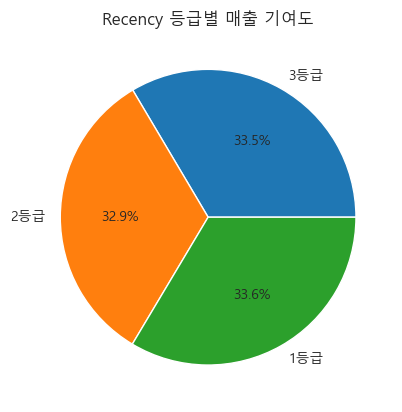

In [164]:
# Recency 등급별 매출 기여도
groupby_recency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title='Recency 등급별 매출 기여도',
    ylabel='',
)

In [165]:
# Frequency 등급
df['frequency_grade'] = pd.qcut(
    x=df['num_purchase_total'], q=num_grades, labels=grade_labels
)

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\1447752713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency_grade'] = pd.qcut(


In [167]:
df['frequency_grade'].value_counts()

frequency_grade
1    854
2    679
3    675
Name: count, dtype: int64

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\799083880.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_frequency_grade = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Frequency 등급별 매출 기여도'}>

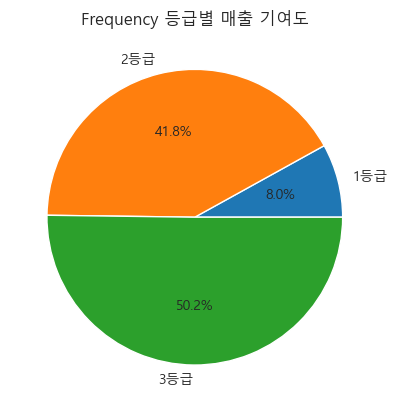

In [168]:
# Frequency 등급별 매출 기여도
groupby_frequency_grade = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()
groupby_frequency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Frequency 등급별 매출 기여도',
    ylabel='',
)

In [169]:
# Monetary 등급
df['monetary_grade'] = pd.qcut(
    x=df['amount_total'], q=num_grades, labels=grade_labels
)

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\788364976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monetary_grade'] = pd.qcut(


In [171]:
df['monetary_grade'].value_counts()

monetary_grade
1    737
3    736
2    735
Name: count, dtype: int64

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\1516449522.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_monetary_grade = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Monetary 등급별 매출 기여도'}>

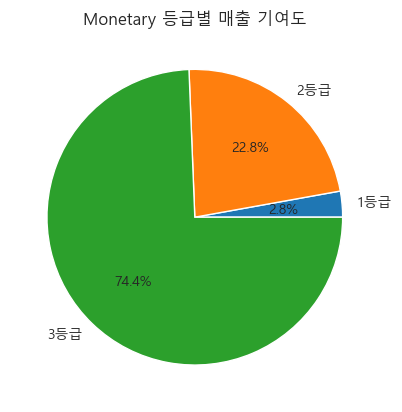

In [172]:
# Monetary 등급별 기여 매출도
groupby_monetary_grade = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()
groupby_monetary_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Monetary 등급별 매출 기여도',
    ylabel='',
)

## 가중합을 이용해 RFM 고객 세그먼트 분류하기
Recency, Frequency, Monetary 각 항목의 등급을 모두 매겼으니 이제 이를 활용해 고객 지표를 구하고 고객 세그먼트 분류까지 해 볼게요. 먼저 Recency, Frequency, Monetary 등급 각각에 가중치를 곱한 뒤 더하면 고객 지표가 계산됩니다. 이 고객 지표를 몇 가지 등급으로 나누면 최종 고객 세그먼트를 구할 수 있죠.

일단 세 항목에 동일하게 가중치를 줄 때 고객 세그먼트가 어떻게 나오는지 확인해 볼까요? 세 항목에 대한 가중치에는 조건이 있었죠. 각각 0보다 크거나 같아야 하고 모두 더했을 때 1이 되어야 합니다. 가중치 조건을 고려했을 때 각 항목에 1/3씩 가중치를 부여하면 되겠군요. 가중치는 weight라는 이름의 딕셔너리 변수를 이용해 관리하겠습니다.

In [174]:
weight = {}
weight['recency'] = 1 / 3
weight['frequency'] = 1 / 3
weight['monetary'] = 1 / 3

여기서 주의할 점이 하나 있는데요. customer_df에 Recency, Frequency, Monetary 각 등급이 숫자 1, 2, 3으로 표시되어 있지만, 엄밀히 말하면 등급 값은 모두 숫자형 데이터가 아니라 범주형 데이터인 상태입니다. 가중치를 적용하는 연산을 하려면 astype() 함수를 이용해 숫자형 데이터로 바꿔 줘야 해요. 어차피 등급 값은 1, 2, 3 뿐이니 정수형으로 바꿔도 무방하겠습니다. 그럼 항목에 맞게 가중치와 등급을 곱한 뒤 더해 줍시다. 이렇게 구한 고객 지표는 customer_df에 rfm_score 컬럼으로 추가할게요.

In [175]:
df['rfm_score'] = (
    weight['recency'] * df['recency_grade'].astype('int')
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int')
)

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\2856532442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_score'] = (


이렇게 구간 경계의 포함 여부가 일관되지 않은 경우에는 cut() 함수로 구간화를 할 수가 없습니다. 그래서 이번에는 apply() 함수를 이용해 구간화를 해 볼게요. 먼저 rfm_score 값을 받으면 위의 기준에 따라 RFM 세그먼트를 리턴해 주는 함수 rfm_segment_bins()를 정의합시다.

In [181]:
def rfm_segment_bins(x):
    if x < 5 / 3:
        return 1
    elif x <= 7 / 3:
        return 2
    else:
        return 3

In [182]:
df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\1803791392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)


In [184]:
df['rfm_segment'].value_counts()

rfm_segment
1    928
2    812
3    468
Name: count, dtype: int64

<Axes: title={'center': 'RFM 고객 세그먼트별 매출 기여도'}>

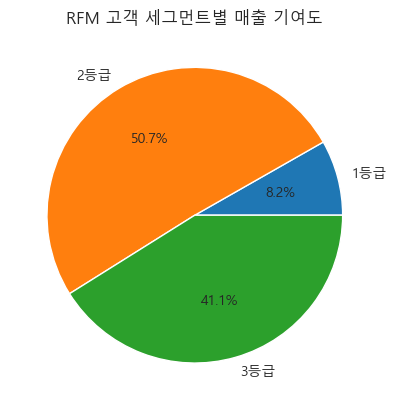

In [186]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel='',
)

In [187]:
# 가중치 재설정
weight['recency'] = 0.2
weight['frequency'] = 0.4
weight['monetary'] = 0.4

# 가중합 계산
df['rfm_score'] = (
    weight['recency'] * df['recency_grade'].astype('int')
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int')
)

# RFM 고객 지표 구간화
df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\3847303657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_score'] = (
C:\Users\wjd43\AppData\Local\Temp\ipykernel_17820\3847303657.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)


In [189]:
df['rfm_segment'].value_counts()

rfm_segment
1    804
3    792
2    612
Name: count, dtype: int64

<Axes: title={'center': 'RFM 고객 세그먼트별 매출 기여도'}>

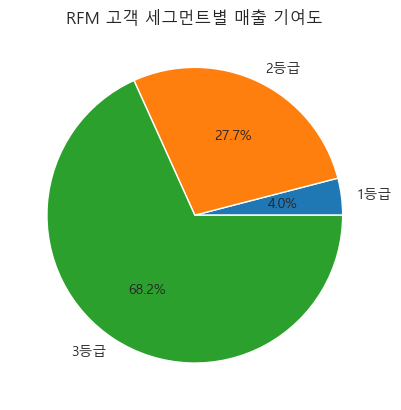

In [191]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel='',
)